In [52]:
import os, sys, time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize

from nltk.corpus import words, stopwords
from nltk.tokenize import RegexpTokenizer

from wordcloud import WordCloud
from PIL import Image

from pandarallel import pandarallel

In [53]:
nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("words")

[nltk_data] Downloading package omw-1.4 to /Users/m/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/m/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/m/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/m/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [54]:
pandarallel.initialize(progress_bar=True, nb_workers=6)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [55]:
sns.set()

## Load data

In [56]:
df = pd.read_csv("./data/df_cleaned.csv")

In [57]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [58]:
df.shape

(7503, 2)

In [59]:
doc = df.text.sample(1)
doc = doc.values[0]
doc

"@stunckle @Gordon_R74 @crazydoctorlady ...I'm no expert but raw uranium and nuclear reactor fuel rods are 2 very different creatures..."

In [60]:
doc = doc.lower()
doc

"@stunckle @gordon_r74 @crazydoctorlady ...i'm no expert but raw uranium and nuclear reactor fuel rods are 2 very different creatures..."

In [61]:
tokens = word_tokenize(doc)
tokens

['@',
 'stunckle',
 '@',
 'gordon_r74',
 '@',
 'crazydoctorlady',
 '...',
 'i',
 "'m",
 'no',
 'expert',
 'but',
 'raw',
 'uranium',
 'and',
 'nuclear',
 'reactor',
 'fuel',
 'rods',
 'are',
 '2',
 'very',
 'different',
 'creatures',
 '...']

In [62]:
len(tokens)

25

In [63]:
len(set(tokens))

22

In [64]:
def display_token_info(tokens):
    print(f"nb tokens {len(tokens)}, nb token uniques {len(set(tokens))}")
    print(tokens[:30])

In [65]:
tokens = wordpunct_tokenize(doc)
display_token_info(tokens)

nb tokens 26, nb token uniques 23
['@', 'stunckle', '@', 'gordon_r74', '@', 'crazydoctorlady', '...', 'i', "'", 'm', 'no', 'expert', 'but', 'raw', 'uranium', 'and', 'nuclear', 'reactor', 'fuel', 'rods', 'are', '2', 'very', 'different', 'creatures', '...']


In [66]:
# Stop words

stop_words = set(stopwords.words("english"))
print(stop_words)

{'those', 'himself', 'it', 'the', 'weren', 'did', 'each', 'some', "you're", "weren't", "hadn't", 'own', "aren't", 'aren', 'doing', 'ourselves', "isn't", "mightn't", 'just', "shan't", 'herself', 'off', 'over', 'which', 'about', 'out', 'how', 'when', 'shan', 'too', 'hadn', 'in', 'i', 'no', 's', 'had', 'ain', 'other', 'themselves', "you'll", 'into', 'ours', 'until', 'but', 'here', 'a', 'whom', "that'll", 'as', 'any', 'most', 'needn', "mustn't", 'because', 'being', 'wasn', 'these', 'few', 'more', 'isn', 'she', 'haven', "wouldn't", 'doesn', "don't", 'by', 'why', 'what', 'through', 'this', 'while', 'who', 'y', 'he', 'from', 'is', 'where', 'will', 'does', 'than', 'for', 'under', 'hasn', 'between', 'don', "couldn't", 'm', 'hers', 'are', "wasn't", 'then', 'we', 'couldn', 'they', 'your', 'if', 'not', 'am', 'now', 'them', 'was', 'up', 'down', 'once', 'its', "you've", 'can', 'of', 'against', 'yours', 'all', 'wouldn', 'ma', 'my', 'him', 'shouldn', "you'd", 'both', 'o', 'do', 'there', 'didn', "doesn

In [67]:
tokens = [w for w in tokens if w not in stop_words]
display_token_info(tokens)

nb tokens 19, nb token uniques 16
['@', 'stunckle', '@', 'gordon_r74', '@', 'crazydoctorlady', '...', "'", 'expert', 'raw', 'uranium', 'nuclear', 'reactor', 'fuel', 'rods', '2', 'different', 'creatures', '...']


In [68]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_token_info(tokens)

nb tokens 20, nb token uniques 20
['stunckle', 'gordon_r74', 'crazydoctorlady', 'i', 'm', 'no', 'expert', 'but', 'raw', 'uranium', 'and', 'nuclear', 'reactor', 'fuel', 'rods', 'are', '2', 'very', 'different', 'creatures']


In [69]:
tokens = [w for w in tokens if w not in stop_words]
display_token_info(tokens)

nb tokens 13, nb token uniques 13
['stunckle', 'gordon_r74', 'crazydoctorlady', 'expert', 'raw', 'uranium', 'nuclear', 'reactor', 'fuel', 'rods', '2', 'different', 'creatures']


In [70]:
def process_text_1(doc, rejoin=False):
    doc = doc.lower().strip()
    
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    clean_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin:
        return " ".join(clean_tokens_list)
    
    return clean_tokens_list

    

In [71]:
tokens = process_text_1(doc)
display_token_info(tokens)

nb tokens 13, nb token uniques 13
['stunckle', 'gordon_r74', 'crazydoctorlady', 'expert', 'raw', 'uranium', 'nuclear', 'reactor', 'fuel', 'rods', '2', 'different', 'creatures']


# Working on the entire corpus

## Build raw corpus

In [72]:
raw_corpus = "".join(df.text.values)
raw_corpus[:1_000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay #

In [73]:
len(raw_corpus)

756907

In [74]:
corpus = process_text_1(raw_corpus)
display_token_info(corpus)

nb tokens 82574, nb token uniques 22438
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'allforest', 'fire', 'near', 'la', 'ronge', 'sask', 'canadaall', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected13', '000', 'people', 'receive', 'wildfires', 'evacuation']


In [75]:
tmp = pd.Series(corpus).value_counts()
tmp

co                  4703
http                4231
https                405
amp                  342
like                 341
                    ... 
destructiontruck       1
salvages               1
7b2wf6ovfk             1
newsrepublican         1
ymy4rskq3d             1
Length: 22438, dtype: int64

In [76]:
# sns.barplot(x=tmp.index, y=tmp.values)

In [77]:
tmp.head(30)

co            4703
http          4231
https          405
amp            342
like           341
û_             289
fire           230
get            226
via            216
2              204
people         189
new            183
one            181
news           166
emergency      145
disaster       143
video          136
would          133
body           127
police         122
still          120
3              119
u              117
crash          117
us             115
storm          114
back           113
day            112
know           112
california     110
dtype: int64

In [78]:
tmp.tail(30)

tydxauuenqhow          1
developer              1
hld5xlywbncrackdown    1
lmwkjsycgj             1
danhrothschild         1
greed                  1
takecare               1
cinla1964              1
windowgatribble        1
contrasts              1
foreboding             1
expansive              1
divisions              1
saturation             1
hue                    1
qbmcsjavt0fall         1
homebuyer              1
miscalculation         1
mwjcdkthere            1
workspace              1
forsee                 1
badkitty               1
lt3dave                1
specs                  1
lore                   1
destructiontruck       1
salvages               1
7b2wf6ovfk             1
newsrepublican         1
ymy4rskq3d             1
dtype: int64

In [79]:
tmp.describe()

count    22438.000000
mean         3.680096
std         43.379216
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4703.000000
dtype: float64

# 3.2 List rare tokens

In [80]:
tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp==1]
list_unique_words[:30]

dub                   1
mxhrextrkh            1
ctijdpxabkdogs        1
splatling             1
foothill              1
designsso             1
thatrussianman        1
waterboarding         1
writingtips           1
salmanmydarling       1
ps3                   1
xboxhttps             1
qr1l2jyuez            1
nester                1
switching             1
dipping               1
pantherattackthere    1
dieanpink95           1
limitsabe             1
yu_nita99             1
sivan                 1
pantherattacki        1
camilla_33            1
uooygbb6az            1
akq4rwjfvlcheck       1
skippy6gaming         1
slttorrlhswho         1
craykain              1
lavalet               1
basalt                1
dtype: int64

In [81]:
len(list_unique_words)

16230

In [82]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['dub',
 'mxhrextrkh',
 'ctijdpxabkdogs',
 'splatling',
 'foothill',
 'designsso',
 'thatrussianman',
 'waterboarding',
 'writingtips',
 'salmanmydarling',
 'ps3',
 'xboxhttps',
 'qr1l2jyuez',
 'nester',
 'switching',
 'dipping',
 'pantherattackthere',
 'dieanpink95',
 'limitsabe',
 'yu_nita99',
 'sivan',
 'pantherattacki',
 'camilla_33',
 'uooygbb6az',
 'akq4rwjfvlcheck',
 'skippy6gaming',
 'slttorrlhswho',
 'craykain',
 'lavalet',
 'basalt']

In [83]:
tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv("./data/unique_words.csv", index=False)

In [84]:
tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp<=5]
list_min_5_words[:30]

motorcycle     5
blind          5
ices           5
remain         5
md             5
mental         5
loves          5
depth          5
extra          5
leaves         5
subs           5
judge          5
earners        5
operations     5
reduced        5
catch          5
stephen        5
quest          5
reviews        5
responsible    5
motor          5
flying         5
smithsonian    5
52             5
34             5
losses         5
desires        5
pulls          5
mood           5
tubestrike     5
dtype: int64

In [85]:
len(list_min_5_words)

20275

In [86]:
list_min_5_words = list(list_min_5_words.index)
tmp = pd.DataFrame({"words": list_min_5_words})
tmp.to_csv("./data/min_5_words.csv", index=False)

In [87]:
tmp = pd.Series(corpus).value_counts()
list_min_10_words = tmp[tmp<=10]
list_min_10_words[:10]

able        10
trees       10
complete    10
udhampur    10
seattle     10
word        10
michael     10
yyc         10
amazon      10
grows       10
dtype: int64

In [88]:
len(list_min_10_words)

21158

In [89]:
list_min_10_words = list(list_min_10_words.index)
tmp = pd.DataFrame({"words": list_min_10_words})
tmp.to_csv("./data/min_10_words.csv", index=False)

## Cleaning function

In [90]:
def process_text_2(
    doc,
    rejoin=False,
    list_rare_words=None,
    min_len_word=3,
    force_is_alpha=True
):
    # list unique words
    if not list_rare_words:
        list_rare_words = []
    
    # lower
    doc = doc.lower().strip()
    
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    clean_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    non_rare_tokens = [w for w in clean_tokens_list if w not in list_rare_words]
    
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N
    
    if rejoin:
        return " ".join(alpha_tokens)
    
    return alpha_tokens
    

In [91]:
display_token_info(corpus)

nb tokens 82574, nb token uniques 22438
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us', 'allforest', 'fire', 'near', 'la', 'ronge', 'sask', 'canadaall', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected13', '000', 'people', 'receive', 'wildfires', 'evacuation']


In [92]:
len(set(corpus))

22438

In [93]:
corpus = process_text_2(raw_corpus, list_rare_words=list_unique_words, rejoin=False)
display_token_info(corpus)

nb tokens 56509, nb token uniques 5705
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'fire', 'near', 'residents', 'asked', 'shelter', 'place', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'wildfires', 'school']


In [94]:
len(set(corpus))

5705

## 3.4 Stem and Lem

In [97]:
doc = "I have 3 dogs, they were all black. Now they are all white but one of my dog is my favorite"

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc.lower())
print(len(tokens), tokens)

21 ['i', 'have', '3', 'dogs', 'they', 'were', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorite']


In [99]:
trans = PorterStemmer()
trans_text = [trans.stem(i) for i in tokens]
print(len(trans_text), trans_text)

21 ['i', 'have', '3', 'dog', 'they', 'were', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorit']


In [100]:
trans = WordNetLemmatizer()
trans_text = [trans.lemmatize(i) for i in tokens]
print(len(trans_text), trans_text)

21 ['i', 'have', '3', 'dog', 'they', 'were', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorite']


In [101]:
def process_text_3(
    doc,
    lemm_or_stemm="stem",
    rejoin=False,
    list_rare_words=None,
    min_len_word=3,
    force_is_alpha=True
):
    # list unique words
    if not list_rare_words:
        list_rare_words = []
    
    # lower
    doc = doc.lower().strip()
    
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    clean_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    non_rare_tokens = [w for w in clean_tokens_list if w not in list_rare_words]
    
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N
    
    if lemm_or_stemm == "lem":
         trans = WordNetLemmatizer()
         trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    
    if rejoin:
        return " ".join(trans_text)
    
    return trans_text
    

In [102]:
corpus = process_text_3(raw_corpus, list_rare_words=list_unique_words, rejoin=False)
pd.Series(corpus).sample(30)

22984         key
30522       flood
35670      slowli
30804      immedi
20196       decad
52969       video
49186        http
43022        riot
9053       extern
49417        http
31128        http
34177     predict
25221      explod
47074        caus
188          care
4746           ye
3444          ask
32335        http
48651      surviv
31527    forecast
42263        http
42962        http
13650       alway
31557        come
39145         nyt
29527      econom
49216        http
7372        chain
21085    hurrican
6023        blood
dtype: object

In [103]:
len(set(corpus))

4420

In [104]:
display_token_info(corpus)

nb tokens 56509, nb token uniques 4420
['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'fire', 'near', 'resid', 'ask', 'shelter', 'place', 'offic', 'evacu', 'shelter', 'place', 'order', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'wildfir', 'school']


## 3.5 Only english words

In [105]:
pd.Series(words.words()).sample(30)

182159           sissyism
59030           earthborn
216190    unexpostulating
194025         sundriness
215078      undirectional
6759        aminoglutaric
192746           subserve
51036            denounce
209705            twindle
181626         similitude
197961         Tanagraean
114460       mesoperiodic
93323           incurvate
224482            untwine
209879         tympanitic
128998         obituarily
233266           woodward
51325           depoetize
140416          patrician
28163       Byzantinesque
646                aburst
122782        Nautiloidea
121178         musquaspen
2006       actinomorphous
164656       reconcilably
191880    subdenomination
100013             jibber
156117         processual
234198          xylocopid
189743       stigmatiform
dtype: object

In [106]:
len(set(words.words()))

235892

In [107]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [108]:
len(set(eng_words))

234377

In [109]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_token_info(eng_words_stem)

nb tokens 236736, nb token uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']


In [111]:
len(set(eng_words_stem))

178311

In [112]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_token_info(eng_words_lem)

nb tokens 236736, nb token uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']


In [113]:
len(set(eng_words_lem))

233450

In [121]:
def process_text_4(
    doc,
    lemm_or_stemm="stem",
    rejoin=False,
    list_rare_words=None,
    min_len_word=3,
    force_is_alpha=True,
    eng_words=None
):
    # list unique words
    if not list_rare_words:
        list_rare_words = []
    
    # lower
    doc = doc.lower().strip()
    
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    clean_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    non_rare_tokens = [w for w in clean_tokens_list if w not in list_rare_words]
    
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N
    
    if lemm_or_stemm == "lem":
         trans = WordNetLemmatizer()
         trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    
    if eng_words:
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text
    
    if rejoin:
        return " ".join(engl_text)

    return engl_text
    

In [122]:
corpus = process_text_4(raw_corpus, list_rare_words=list_unique_words, rejoin=False, eng_words=eng_words_stem)
display_token_info(corpus)

nb tokens 46983, nb token uniques 3461
['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'fire', 'near', 'resid', 'ask', 'shelter', 'place', 'offic', 'evacu', 'shelter', 'place', 'order', 'peopl', 'receiv', 'wildfir', 'evacu', 'order', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'wildfir', 'school']


In [123]:
len(set(corpus))

3461

## 3.7 Wordcloud

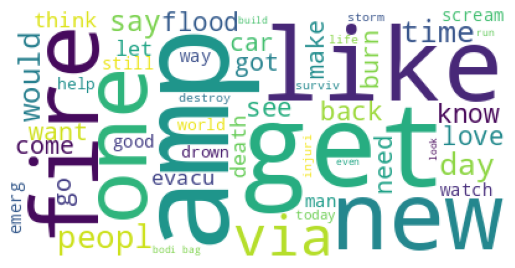

In [125]:
wordcloud = WordCloud(background_color="white",
                      stopwords=[],
                      max_words=50).generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4. Divide the corpus

### 4.1 Separate 0/1

In [126]:
df_1 = df[df.target == 1]
df_0 = df[df.target == 0]

df_0.head()

,text,target
15,What's up man?,0
16,I love fruits,0
17,Summer is lovely,0
18,My car is so fast,0
19,What a goooooooaaaaaal!!!!!!,0


In [127]:
df_1.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [128]:
corpus_1 = " ".join(df_1.text)
corpus_0 = " ".join(df_0.text)

### Process boths of them

In [129]:
corpus_1 = process_text_4(corpus_1, rejoin=False, list_rare_words=list_min_5_words, eng_words=eng_words_stem)
corpus_0 = process_text_4(corpus_0, rejoin=False, list_rare_words=list_min_5_words, eng_words=eng_words_stem)


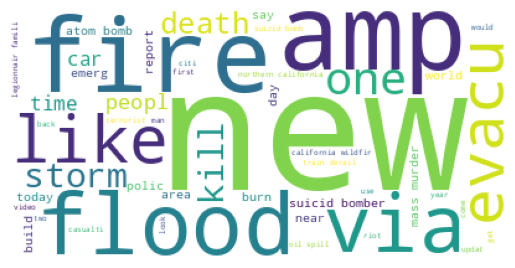

In [130]:
wordcloud = WordCloud(background_color="white",
                      stopwords=[],
                      max_words=50).generate(" ".join(corpus_1))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

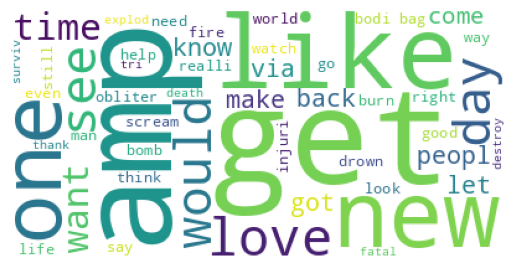

In [131]:
wordcloud = WordCloud(background_color="white",
                      stopwords=[],
                      max_words=50).generate(" ".join(corpus_0))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [132]:
pd.Series(corpus_1).value_counts().head(20)

fire          262
bomb          179
kill          159
news          140
amp           134
via           119
flood         118
disast        116
california    114
crash         108
polic         108
suicid        106
attack        104
home          103
famili        102
like          102
peopl         102
train         100
storm          95
evacu          94
dtype: int64

In [134]:
pd.Series(corpus_0).value_counts().head(20)

like      303
get       223
amp       208
new       170
one       137
love      119
bodi      119
bag       111
time      103
day       102
video     101
would     100
make       99
see        98
scream     98
via        98
peopl      93
want       93
know       91
burn       90
dtype: int64

In [135]:
n = 10
doublons = [i for i in pd.Series(corpus_1).value_counts().head(n).index
            if i in pd.Series(corpus_0).value_counts().head(n).index]
doublons

['amp']

In [138]:
n = 20
doublons = [i for i in pd.Series(corpus_1).value_counts().head(n).index
            if i in pd.Series(corpus_0).value_counts().head(n).index]
doublons

['amp', 'via', 'like', 'peopl']

## 4.3.5 cleaning function

In [141]:
def process_text_5(
    doc,
    lemm_or_stemm="stem",
    rejoin=False,
    list_rare_words=None,
    min_len_word=3,
    force_is_alpha=True,
    eng_words=None,
    extra_words=None
):
    # list unique words
    if not list_rare_words:
        list_rare_words = []
    
    # lower
    doc = doc.lower().strip()
    
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    clean_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    non_rare_tokens = [w for w in clean_tokens_list if w not in list_rare_words]
    
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N
    
    if lemm_or_stemm == "lem":
         trans = WordNetLemmatizer()
         trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    
    if eng_words:
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text
    
    
    final = [w for w in engl_text if w not in extra_words]
    
    if rejoin:
        return " ".join(final)

    return final
    

In [142]:
corpus = process_text_5(raw_corpus, list_rare_words=list_unique_words, rejoin=False, eng_words=eng_words_stem, extra_words=doublons)
display_token_info(corpus)

nb tokens 45833, nb token uniques 3457
['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'fire', 'near', 'resid', 'ask', 'shelter', 'place', 'offic', 'evacu', 'shelter', 'place', 'order', 'receiv', 'wildfir', 'evacu', 'order', 'california', 'got', 'sent', 'photo', 'alaska', 'smoke', 'wildfir', 'school', 'updat']


In [145]:
def final_clean(doc):
    new_doc =  process_text_5(doc, list_rare_words=list_unique_words, rejoin=False, eng_words=eng_words_stem, extra_words=doublons)
    return new_doc

In [146]:
df["clean_text"] = df.text.parallel_apply(final_clean)

In [147]:
df.sample(20)

,text,target,clean_text
1246,Now on WSLS: fire burns multiple buildings in ...,1,"[fire, burn, multipl, build, tip, make, less, ..."
3382,Learn How I Gained Access To The Secrets Of Th...,0,"[learn, gain, access, secret, top, earner, use..."
5015,#Japan #Fukushima the most serious man made di...,1,"[japan, seriou, man, made, disast, human, hist..."
736,My ear started bleeding again...,0,"[ear, start, bleed]"
5546,Short of throwing them overboard himself I don...,1,"[short, throw, think, leader, could, much, wor..."
5900,@HimeRuisu I'm going to ram your ass so hard I...,0,"[go, ass, hard, face, pillow, scream, pain, pl..."
3724,#RFP: Fire Truck Service Body for F-450 (Fire ...,0,"[fire, truck, servic, bodi, fire, fight, rescu..."
5205,Families to sue over Legionnaires: More than 4...,1,"[famili, sue, legionnair, famili, affect, fata..."
2135,FCO Minister @Tobias_Ellwood condemns attack a...,1,"[minist, attack, mosqu, result, least, death]"
6355,meek mill should join isis since he loves suic...,0,"[meek, mill, join, isi, sinc, love, suicid, bo..."


In [148]:
sub_df = df[df.target ==1]

for isx, ser in sub_df.sample(10).iterrows():
    print(ser["text"])
    print(ser["clean_text"])
    print()

OMG Horrible Accident Man Died in Wings of Airplane. http://t.co/xDxDPrcPnS
['horribl', 'accid', 'man', 'die', 'wing', 'airplan']

@_chelsdelong12 @kendra_leigh13 I'll crash it
['crash']

China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/BqBLWiw08g #ROIMentor #yycwalks
['china', 'stock', 'market', 'crash', 'gem', 'rubbl']

Still Uninvestigated After 50 Years: Did the U.S. Help Incite the 1965 Indonesia Massacre? http://t.co/EZbTG81trz
['still', 'year', 'help', 'massacr']

'The Terrorist Tried to Get Out of the Car; I Shot Him' http://t.co/VSoxKbt6Nq
['terrorist', 'tri', 'get', 'car', 'shot']

Gotta love #summer in #Calgary. #yyc #hailstorm #crazyweather http://t.co/xQbWnLBBIu
['love', 'summer', 'hailstorm']

Obama Declares Disaster for Typhoon-Devastated Saipan
['declar', 'disast', 'typhoon', 'devast']

Hey the #Royals love doing damage with 2 outs.
['hey', 'royal', 'love', 'damag']

@nataliealund 
Parents of Colorado theater shooting victim fear copycat massacre

h

In [ ]:
sub_df = df[df.target ==0]

for isx, ser in sub_df.sample(10).iterrows():
    print(ser["text"])
    print(ser["clean_text"])
    print()